In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *

df_raw = pd.read_excel("port_13.xlsx", sheet_name="ANOVA", skiprows=1)

df_mnm_regular = df_raw[["Regular", "Peanut", "PB"]]
print(df_mnm_regular)
df_mnm_blue = df_raw[["Regular.1", "Peanut.1", "PB.1"]]
print(df_mnm_blue)

    Regular  Peanut  PB
0        16      10  14
1        15      14  19
2        14      10  19
3        16      15  15
4        16      11  12
5        14      15  12
6        15      13  18
7        16      15  14
8        14      12  16
9        16      13  15
10       16      12  15
11       15      13  17
12       15      12  14
13       14      10  17
14       14      15  19
15       16      15  14
16       16      14  20
17       16      10  12
18       16      15  13
19       13      14  12
20       15      14  19
21       15      13  12
22       14      11  16
23       16      14  19
24       21      11  12
    Regular.1  Peanut.1  PB.1
0           2         7     3
1           2         4     3
2           3         7     2
3           1         6     2
4           1         6     0
5           1         7     1
6           0         7     3
7           2         5     2
8           0         5     0
9           1         7     0
10          3         6     0
11          2   

In [4]:
anova_result = f_oneway(df_mnm_regular['Regular'],
                        df_mnm_regular['Peanut'],
                        df_mnm_regular['PB'])

# Print ANOVA results
print('ANOVA results:')
print(f'F-statistic: {anova_result.statistic}')
print(f'P-value: {anova_result.pvalue}')

ANOVA results:
F-statistic: 12.286367098248288
P-value: 2.5657059603972147e-05


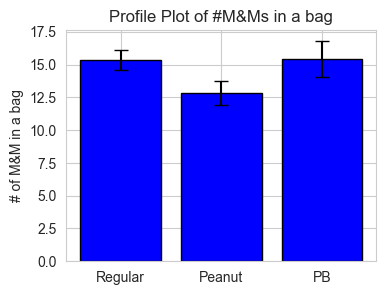

In [5]:
# Sample data
errors = [np.std(df_mnm_regular["Regular"],ddof=1)/2, np.std(df_mnm_regular["Peanut"],ddof=1)/2, np.std(df_mnm_regular["PB"],ddof=1)/2]

# Create a bar chart with error bars
plt.figure(figsize=(4,3))
plt.bar(["Regular", "Peanut", "PB"], [np.mean(df_mnm_regular["Regular"]), np.mean(df_mnm_regular["Peanut"]), np.mean(df_mnm_regular["PB"])], yerr=errors, capsize=5, color='blue', edgecolor='black')

# Add labels and title
plt.ylabel('# of M&M in a bag')
plt.title('Profile Plot of #M&Ms in a bag')

# Show the plot
plt.show()


In [6]:
anova_result = f_oneway(df_mnm_blue['Regular.1'],
                        df_mnm_blue['Peanut.1'],
                        df_mnm_blue['PB.1'])

# Print ANOVA results
print('ANOVA results:')
print(f'F-statistic: {anova_result.statistic}')
print(f'P-value: {anova_result.pvalue}')

ANOVA results:
F-statistic: 39.7558790593505
P-value: 2.3329300327497342e-12


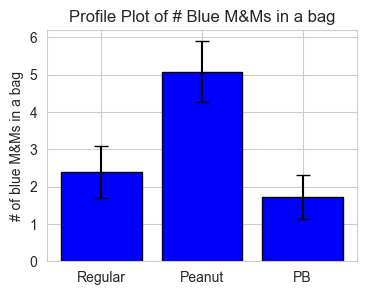

In [7]:
# Sample data
errors = [np.std(df_mnm_blue["Regular.1"],ddof=1)/2, np.std(df_mnm_blue["Peanut.1"],ddof=1)/2, np.std(df_mnm_blue["PB.1"],ddof=1)/2]

# Create a bar chart with error bars
plt.figure(figsize=(4,3))
plt.bar(["Regular", "Peanut", "PB"], [np.mean(df_mnm_blue["Regular.1"]), np.mean(df_mnm_blue["Peanut.1"]), np.mean(df_mnm_blue["PB.1"])], yerr=errors, capsize=5, color='blue', edgecolor='black')

# Add labels and title
plt.ylabel('# of blue M&Ms in a bag')
plt.title('Profile Plot of # Blue M&Ms in a bag')

# Show the plot
plt.show()

In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df_raw_2 = pd.read_excel("port_13.xlsx", sheet_name="Regression", names=["type", "regulars", "blues"], skiprows=1)

# Perform simple linear regression
X = sm.add_constant(df_raw_2['regulars'])
model = sm.OLS(df_raw_2['blues'], X)
result = model.fit()

# Display the regression summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  blues   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     6.221
Date:                Fri, 15 Dec 2023   Prob (F-statistic):             0.0149
Time:                        22:21:46   Log-Likelihood:                -153.66
No. Observations:                  74   AIC:                             311.3
Df Residuals:                      72   BIC:                             315.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5355      1.404      4.656      0.0

In [19]:
from sklearn import linear_model

X = np.array(df_raw_2['regulars']).reshape(-1, 1)
Y = np.array(df_raw_2['blues']).reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X, Y)

print("Coefficient: ", model.coef_)

Coefficient:  [[-0.2380126]]


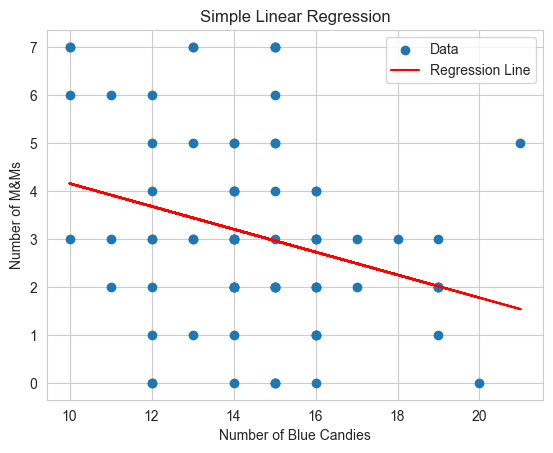

In [23]:
# Plot the regression line
plt.scatter(df_raw_2['regulars'], df_raw_2['blues'], label='Data')
plt.plot(df_raw_2['regulars'], result.predict(), color='red', label='Regression Line')
plt.xlabel('Number of Blue Candies')
plt.ylabel('Number of M&Ms')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()